In [1]:
%matplotlib inline


# Classifier comparison

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.

[source](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# X, y = make_classification(
#     n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
# )
# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
# linearly_separable = (X, y)

# datasets = [
#     make_moons(noise=0.3, random_state=0),
#     make_circles(noise=0.2, factor=0.5, random_state=1),
#     linearly_separable,
# ]

# names = ['moon.pkl', 'circle.pkl', 'line.pkl']
# dfs = []
# for n, (X, y) in enumerate(datasets):
#     X = StandardScaler().fit_transform(X)
#     df = pd.DataFrame(X, columns=['X1', 'X2'])
#     df['y'] = y
#     df.to_pickle(f'./data/{names[n]}')
#     dfs.append(df)

In [5]:
moon = pd.read_pickle('https://raw.githubusercontent.com/Kamil128/Training_DS_Classification/main/data/moon.pkl')
circle = pd.read_pickle('https://raw.githubusercontent.com/Kamil128/Training_DS_Classification/main/data/circle.pkl')
line = pd.read_pickle('https://raw.githubusercontent.com/Kamil128/Training_DS_Classification/main/data/line.pkl')

In [6]:
X = line[['X1', 'X2']].values
y = line['y'].values

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

In [7]:
def plot_decision(clf, X_train, X_test, y_train, y_test, colab=True):
    fig, ax = plt.subplots(1, 3, figsize=(27, 9))
    
    fig.suptitle(clf, fontsize=20)

    ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='x', s=100)
    ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.6, edgecolors="k",  s=100)
    ax[0].set_xlim(x_min, x_max)
    ax[0].set_ylim(y_min, y_max)

    ##
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    cm = plt.cm.PRGn
    # https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

    if colab:
        plot_decision_regions(X_train, y_train, clf=clf, legend=2, ax=ax[1])
    else:
        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax[1], eps=0.5, 
                                               grid_resolution=100, response_method="predict")
        
        ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='x', s=100)
        ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.6, edgecolors="k", s=100)

        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax[2], eps=0.5, 
                                               grid_resolution=100, response_method="auto")
        ax[2].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='x', s=100)
        ax[2].scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.6, edgecolors="k", s=100)

    plt.show()



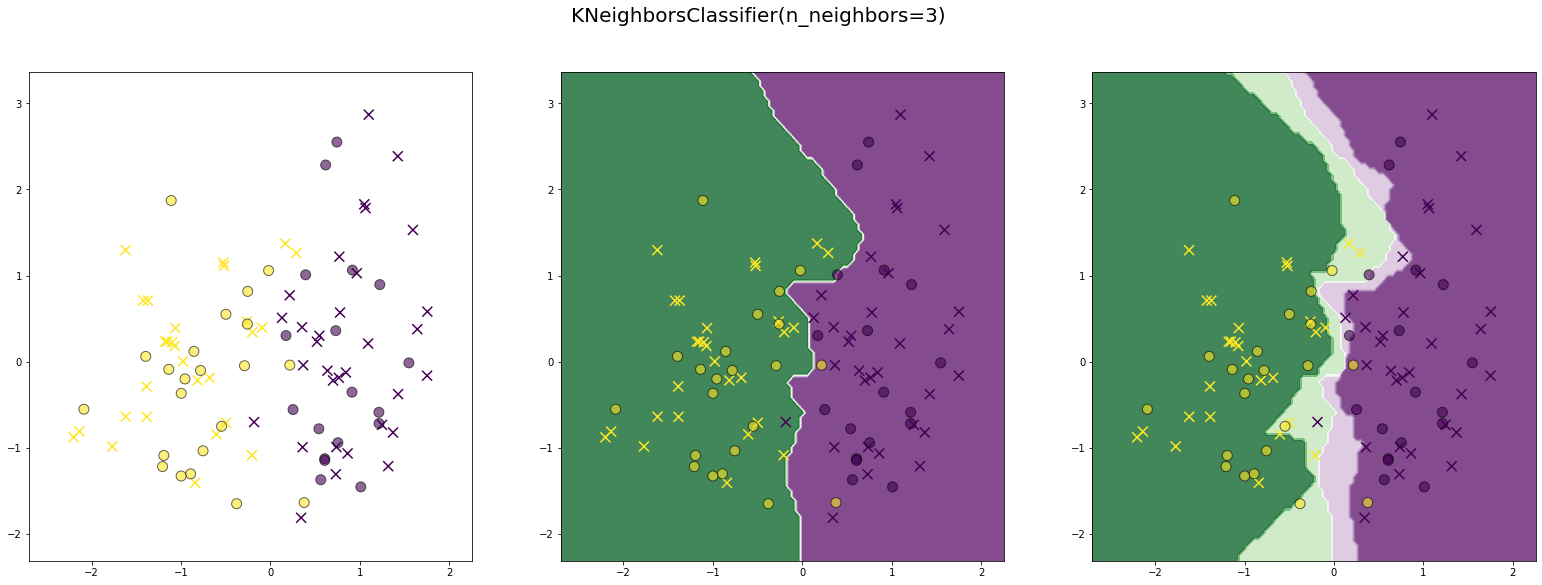

In [8]:
knn = KNeighborsClassifier(3)
plot_decision(knn, X_train, X_test, y_train, y_test, colab=False)

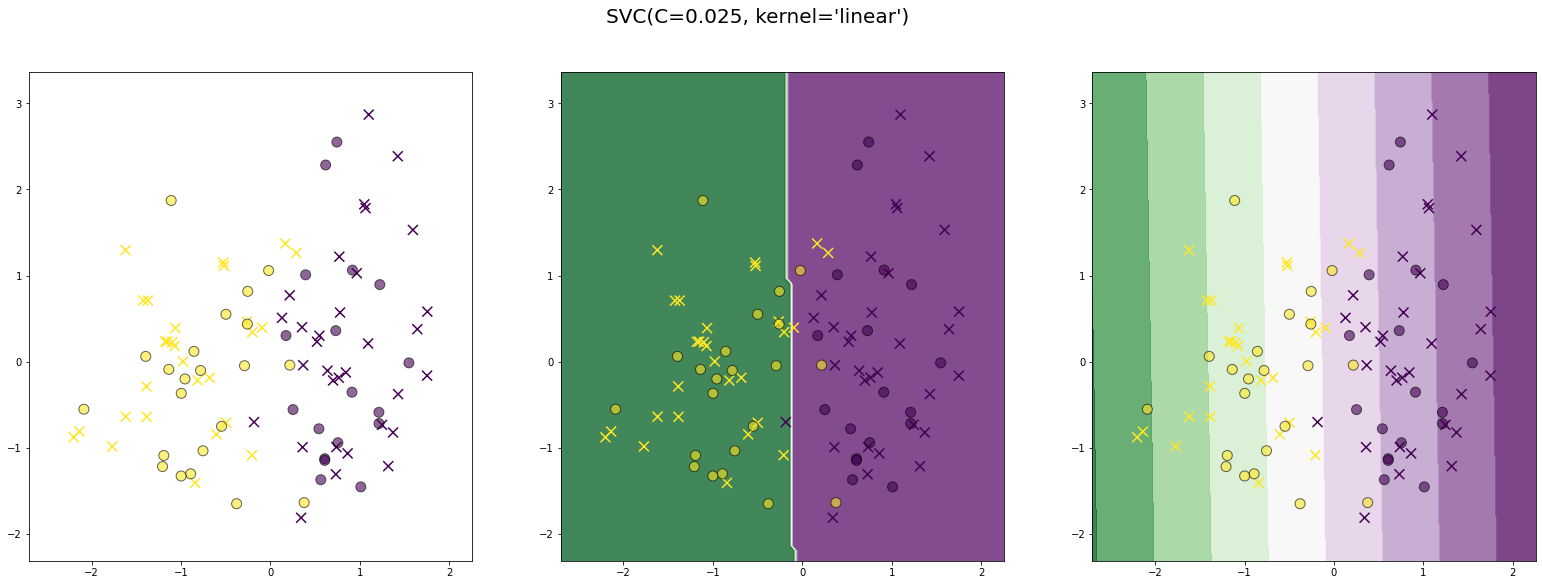

In [9]:
clf = SVC(kernel="linear", C=0.025)
plot_decision(clf, X_train, X_test, y_train, y_test, colab=False)

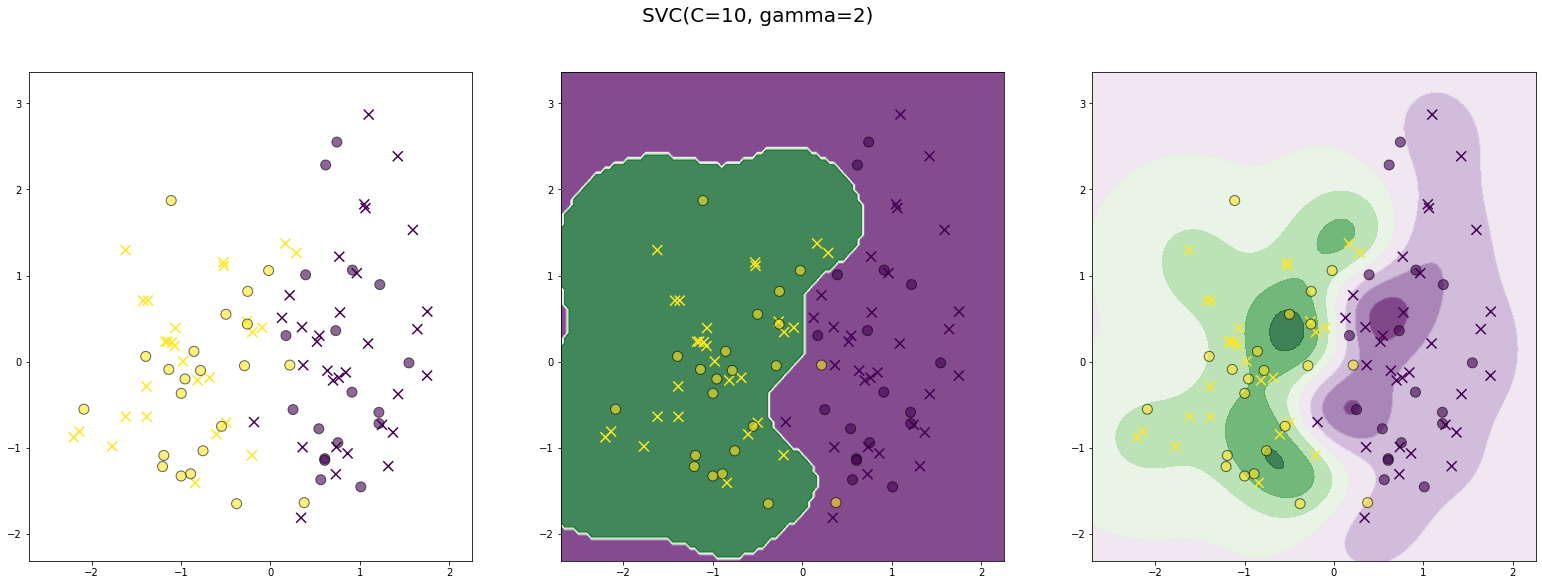

In [10]:
clf = SVC(kernel='rbf', gamma=2, C=10)
plot_decision(clf, X_train, X_test, y_train, y_test, colab=False)

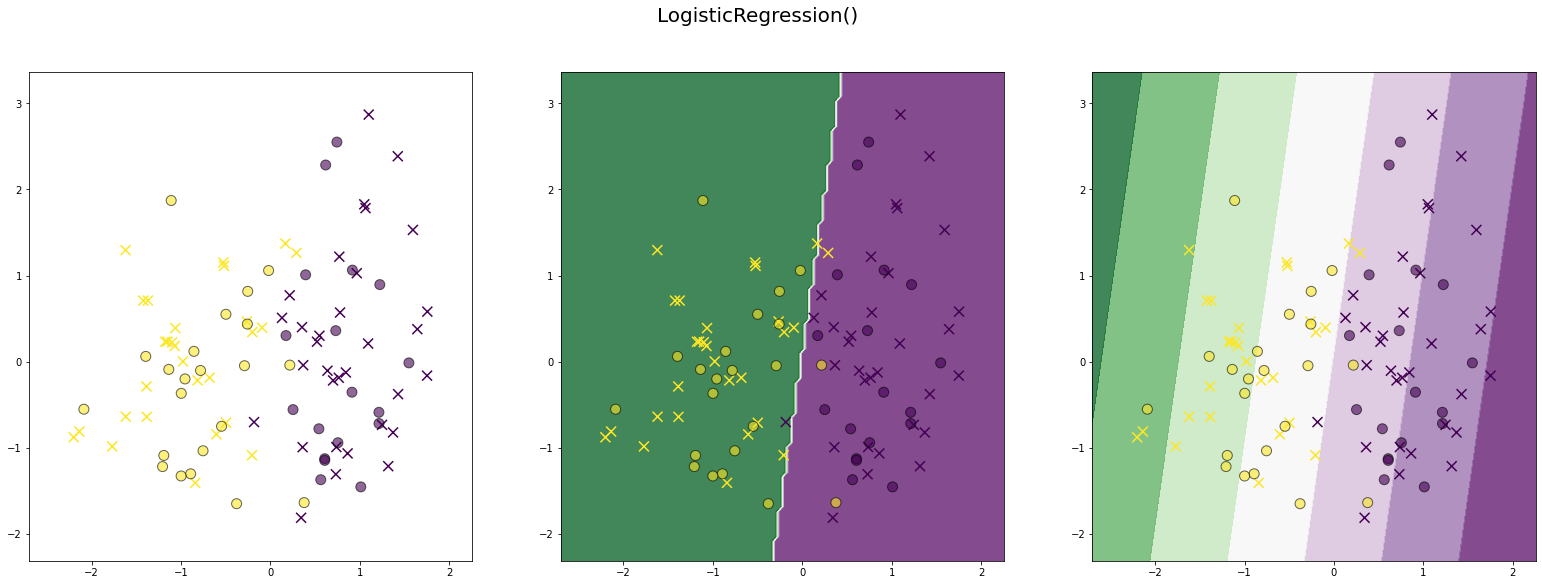

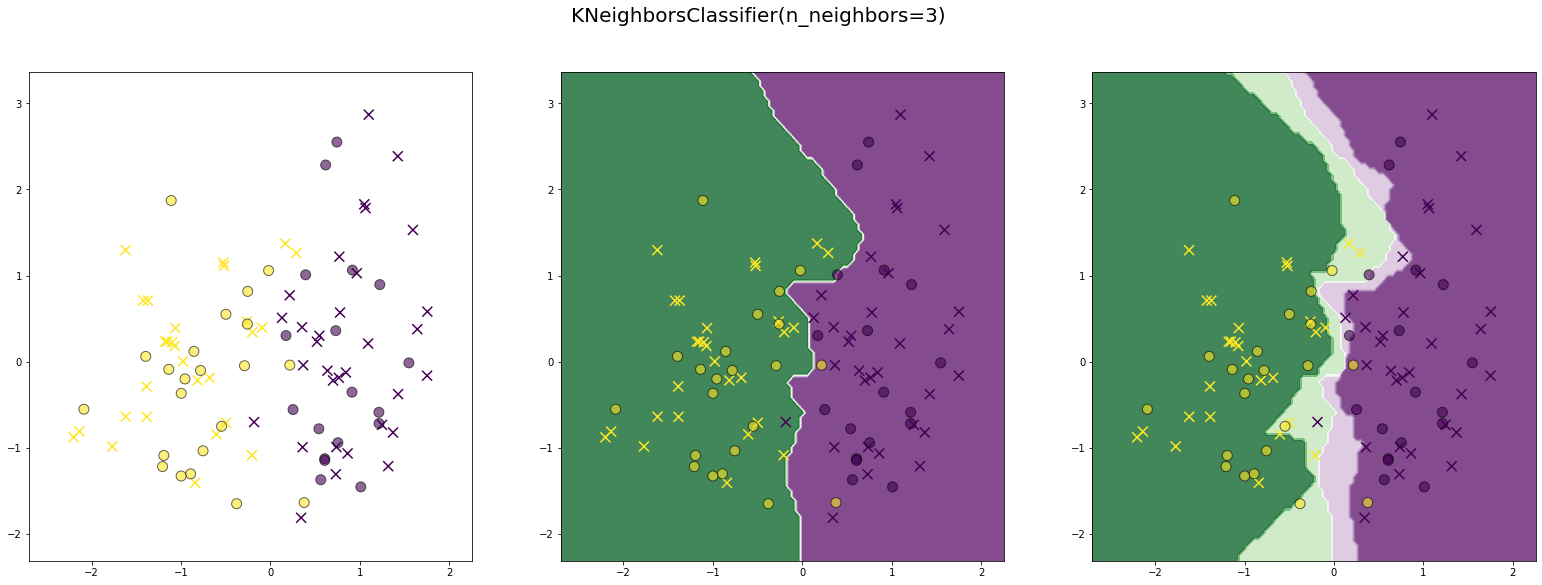

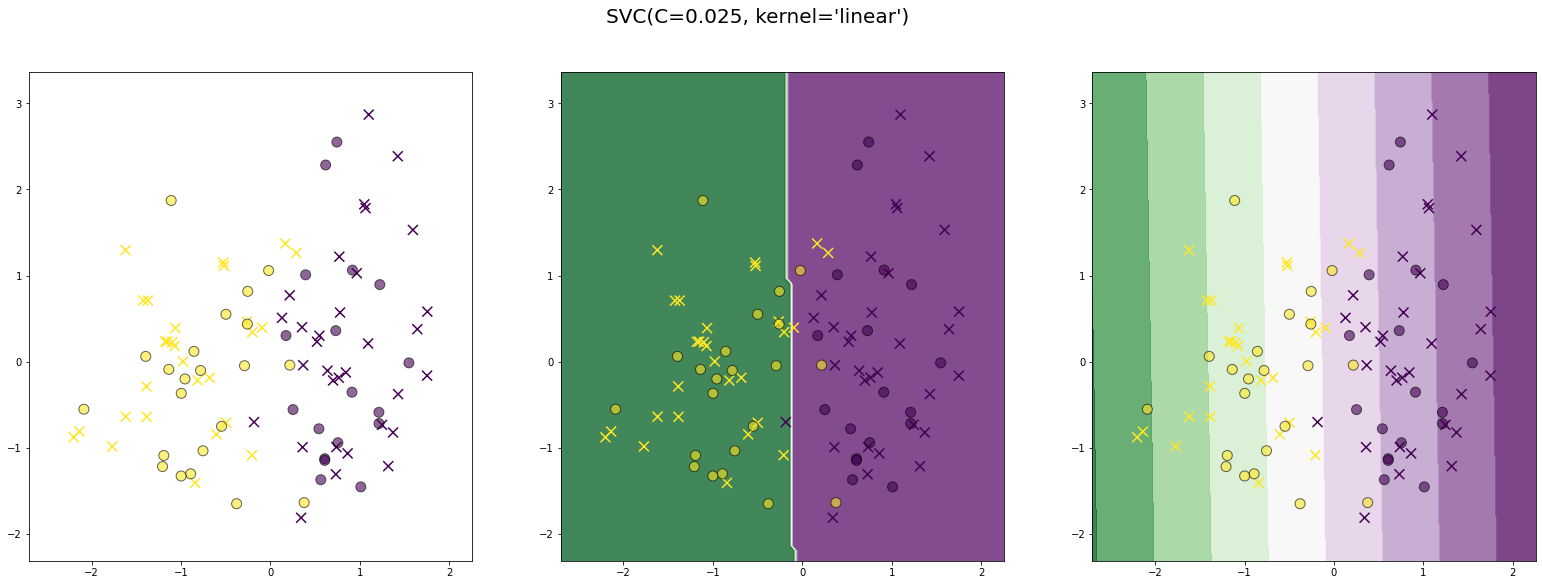

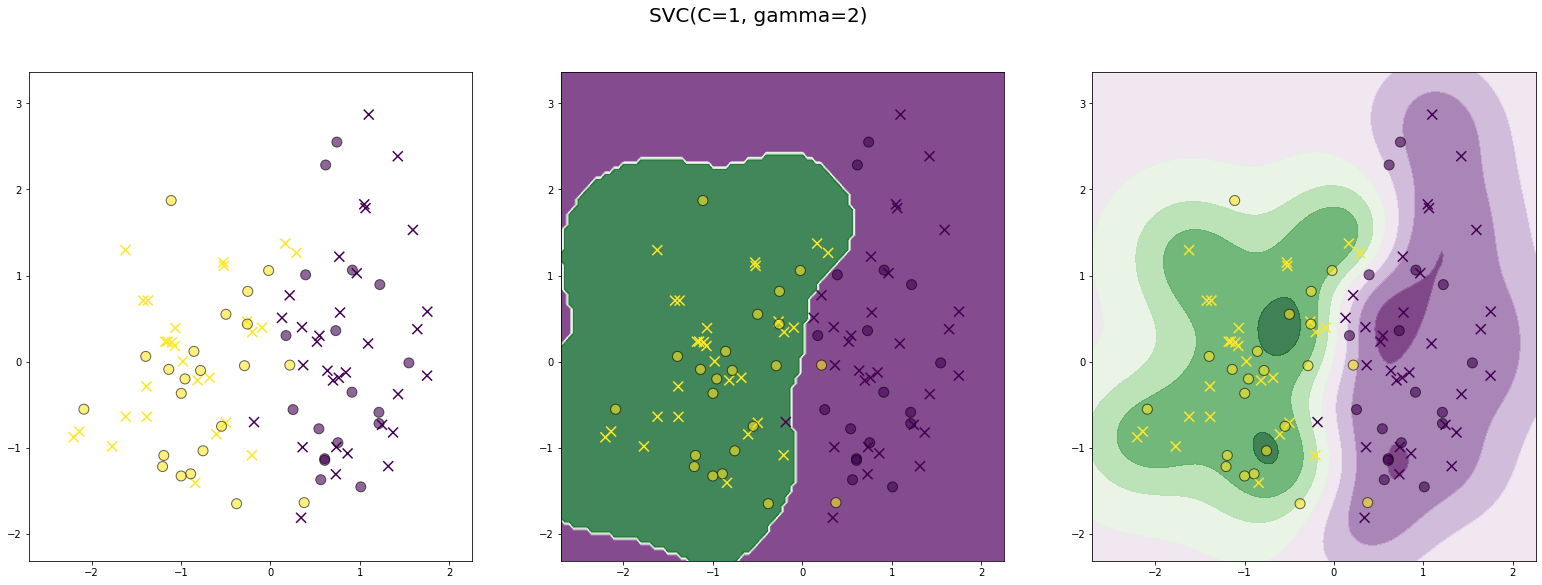

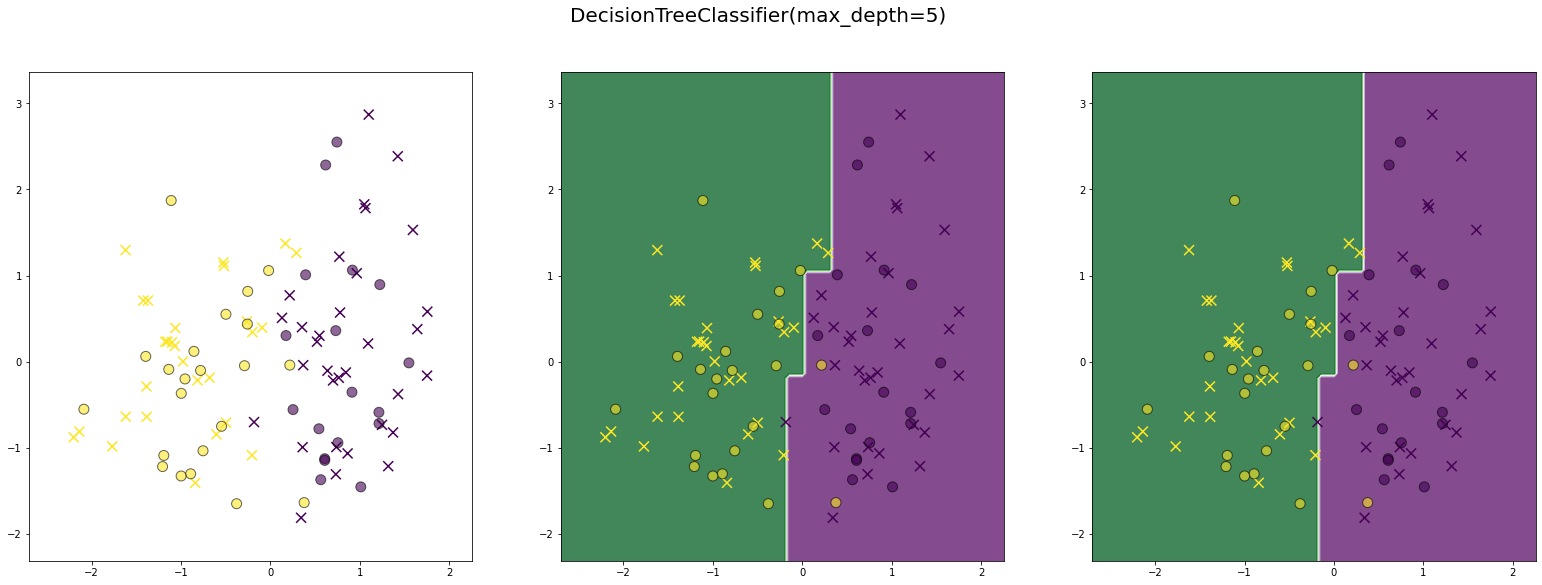

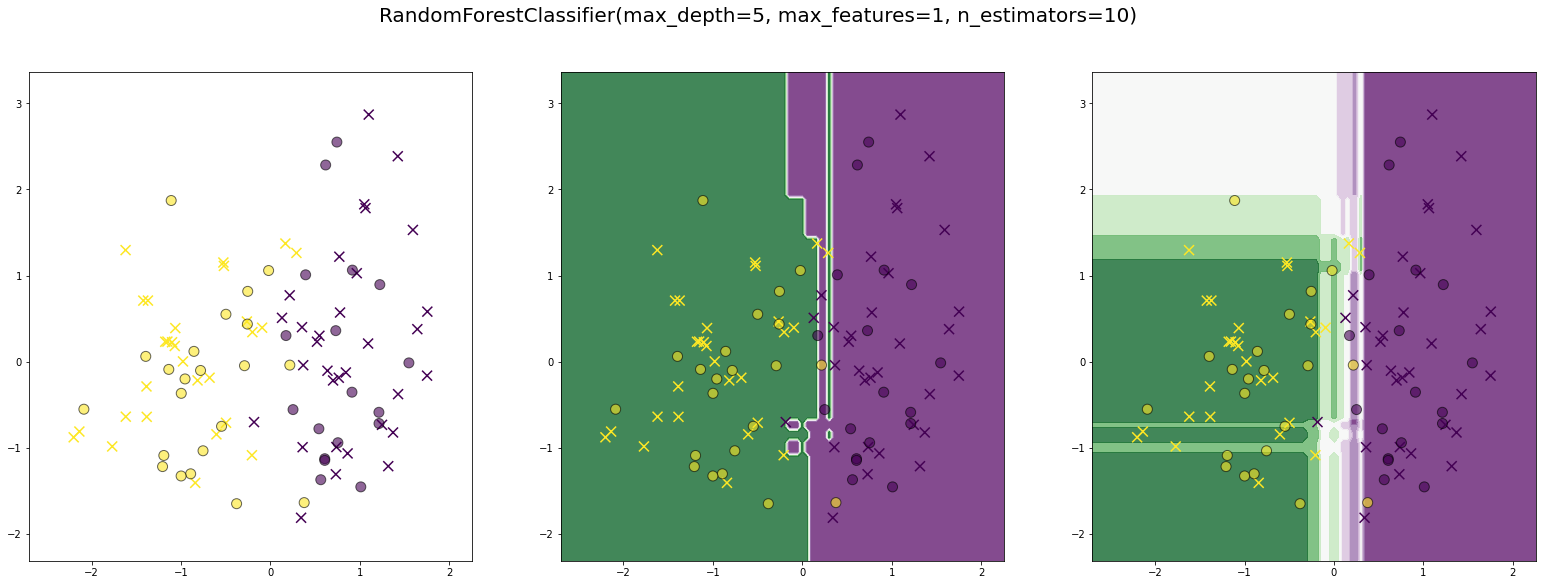

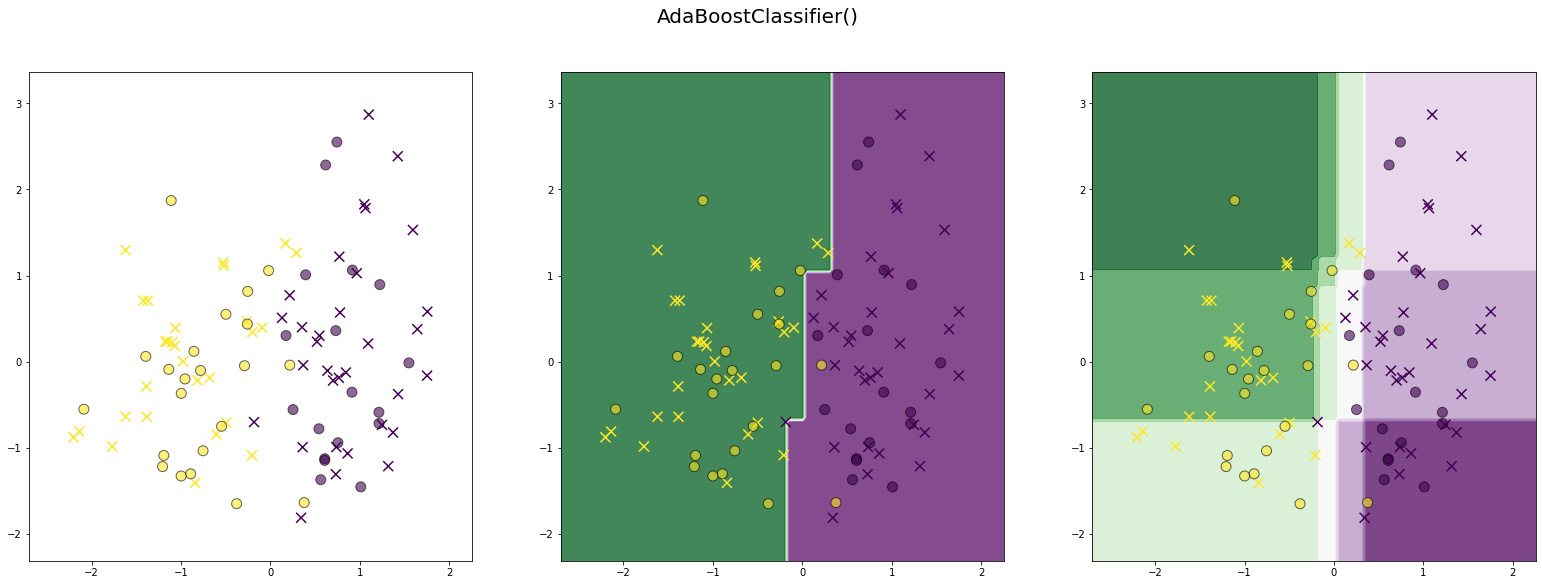

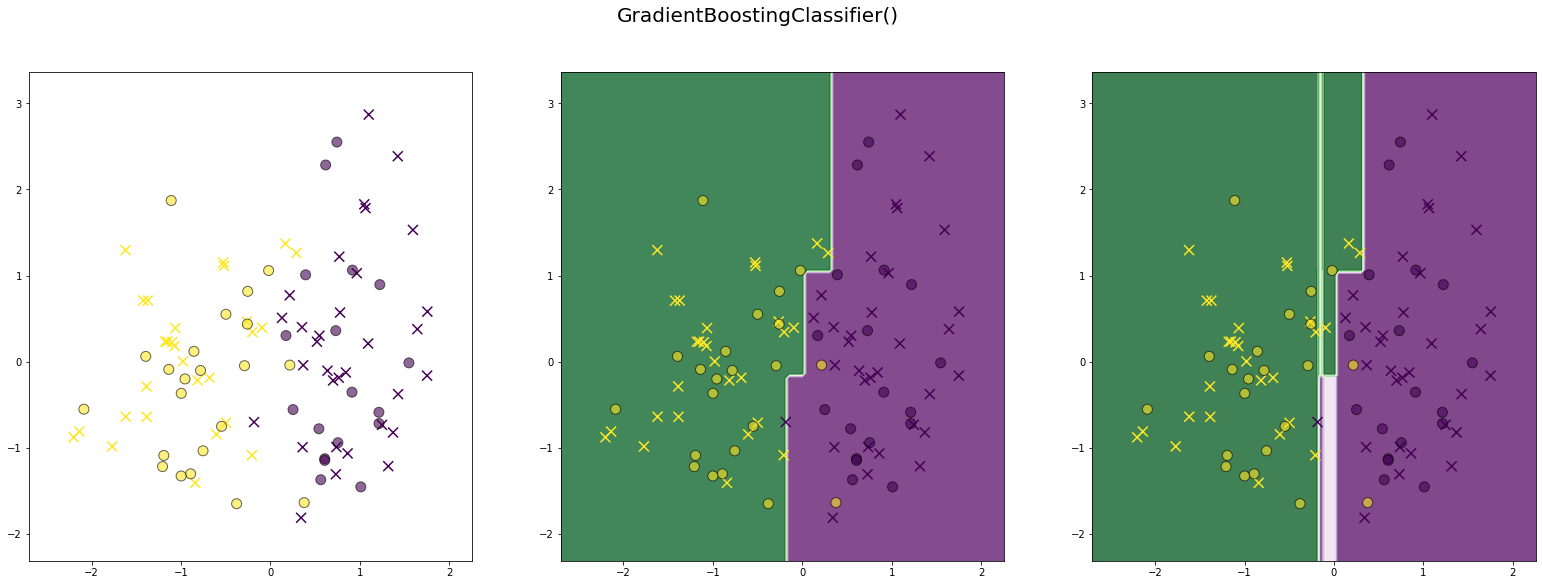

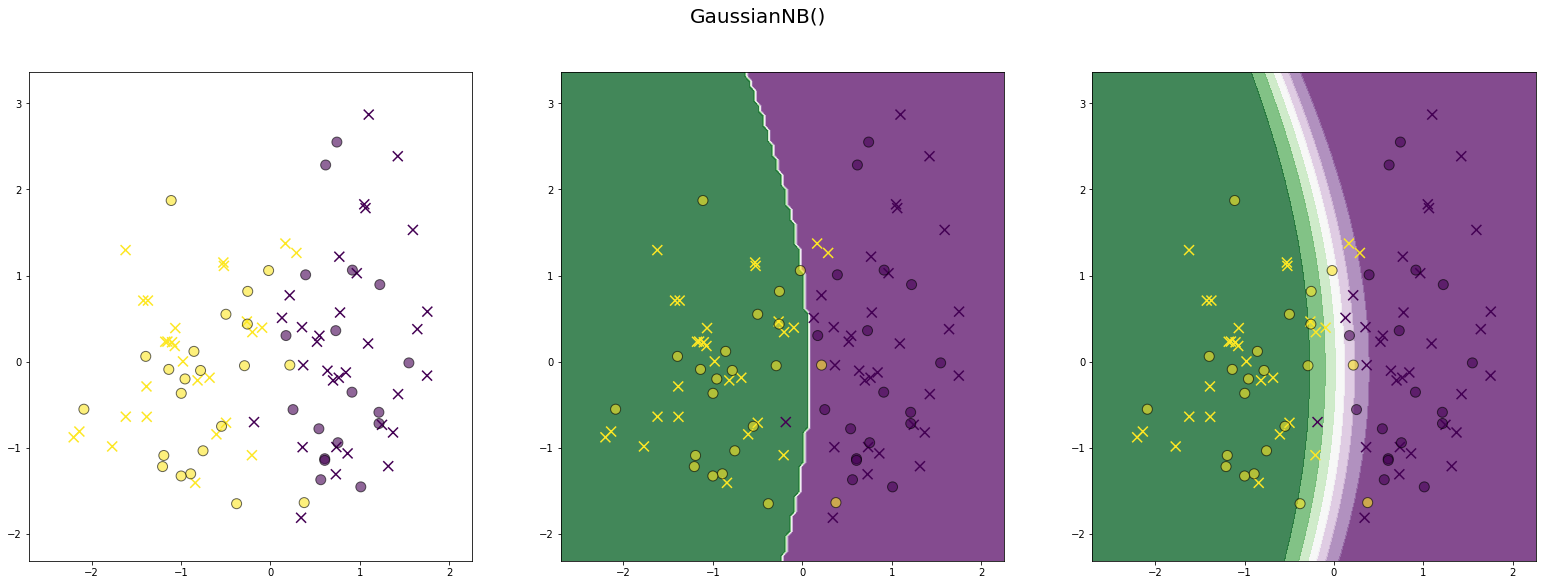

In [11]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
]

for clf in classifiers:
    plot_decision(clf, X_train, X_test, y_train, y_test, colab=False)